### Thesis notebook to show descriptive analysis of post processing data and Linear Regression on the data with only Psychological Factors

In [1]:
# import the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import the dataset
data = pd.read_csv("Present Bias Conditions DF.csv")

data

Age Group  Gender  Education  Ethnicity  MFA Familiarity Count  \
0            3       0          5          4                      4   
1            2       0          5          5                      6   
2            2       1          3          5                      4   
3            2       2          3          1                      5   
4            1       2          5          5                      5   
..         ...     ...        ...        ...                    ...   
181          1       0          5          5                      3   
182          1       2          3          5                      3   
183          1       0          4          5                      6   
184          4       2          4          5                      6   
185          2       0          4          1                      6   

     Security Beliefs  Security Importance  Quick Log In Importance  \
0                   2                   10                        9   
1                   2                    7                       10   
2                   2                    6                        8   
3                   2                   10                       10   
4                   2                   10                       10   
..                ...                  ...                      ...   
181                 2                   10                       10   
182                 2                    8                       10   
183                 2                   10                        8   
184                 2                   10                        6   
185                 2                    7                        7   

     Log In Usability Importance  Log In Convenience Importance  \
0                             10                              9   
1                              9                              7   
2                              8                              8   
3                             10                             10   
4                             10                             10   
..                           ...                            ...   
181                           10                             10   
182                            7                             10   
183                            8                              8   
184                            6                              6   
185                            7                              6   

     Log In Satisfaction  MFA Opt In Frequency  Present Bias  
0                      8                     2             1  
1                      8                     1             1  
2                      7                     1             1  
3                     10                     2             0  
4                     10                     2             0  
..                   ...                   ...           ...  
181                    6                     3             0  
182                    7                     2             1  
183                    7                     2             1  
184                   10                     3             0  
185                   10                     1             1  

[186 rows x 13 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age Group                      186 non-null    int64
 1   Gender                         186 non-null    int64
 2   Education                      186 non-null    int64
 3   Ethnicity                      186 non-null    int64
 4   MFA Familiarity Count          186 non-null    int64
 5   Security Beliefs               186 non-null    int64
 6   Security Importance            186 non-null    int64
 7   Quick Log In Importance        186 non-null    int64
 8   Log In Usability Importance    186 non-null    int64
 9   Log In Convenience Importance  186 non-null    int64
 10  Log In Satisfaction            186 non-null    int64
 11  MFA Opt In Frequency           186 non-null    int64
 12  Present Bias                   186 non-null    int64
dtypes: int64(13)
memory 

In [4]:
data.describe()

Age Group      Gender   Education   Ethnicity  MFA Familiarity Count  \
count  186.000000  186.000000  186.000000  186.000000             186.000000   
mean     1.677419    0.709677    3.913978    2.725806               4.596774   
std      0.937637    0.953862    0.937575    1.861438               1.312637   
min      1.000000    0.000000    1.000000    0.000000               1.000000   
25%      1.000000    0.000000    3.000000    1.000000               4.000000   
50%      1.000000    0.000000    4.000000    2.000000               5.000000   
75%      2.000000    2.000000    5.000000    5.000000               6.000000   
max      6.000000    2.000000    5.000000    5.000000               6.000000   

       Security Beliefs  Security Importance  Quick Log In Importance  \
count        186.000000           186.000000               186.000000   
mean           1.913978             9.365591                 8.806452   
std            0.349700             1.146416                 1.550993   
min            0.000000             4.000000                 2.000000   
25%            2.000000             9.000000                 8.000000   
50%            2.000000            10.000000                 9.000000   
75%            2.000000            10.000000                10.000000   
max            2.000000            10.000000                10.000000   

       Log In Usability Importance  Log In Convenience Importance  \
count                   186.000000                     186.000000   
mean                      8.833333                       8.892473   
std                       1.390767                       1.444186   
min                       3.000000                       4.000000   
25%                       8.000000                       8.000000   
50%                       9.000000                       9.000000   
75%                      10.000000                      10.000000   
max                      10.000000                      10.000000   

       Log In Satisfaction  MFA Opt In Frequency  Present Bias  
count            186.00000            186.000000    186.000000  
mean               8.27957              1.876344      0.666667  
std                1.52362              0.812590      0.472677  
min                3.00000              0.000000      0.000000  
25%                7.00000              1.000000      0.000000  
50%                8.00000              2.000000      1.000000  
75%               10.00000              2.750000      1.000000  
max               10.00000              3.000000      1.000000

In [5]:
data.columns

Index(['Age Group', 'Gender', 'Education', 'Ethnicity',
       'MFA Familiarity Count', 'Security Beliefs', 'Security Importance',
       'Quick Log In Importance', 'Log In Usability Importance',
       'Log In Convenience Importance', 'Log In Satisfaction',
       'MFA Opt In Frequency', 'Present Bias'],
      dtype='object')

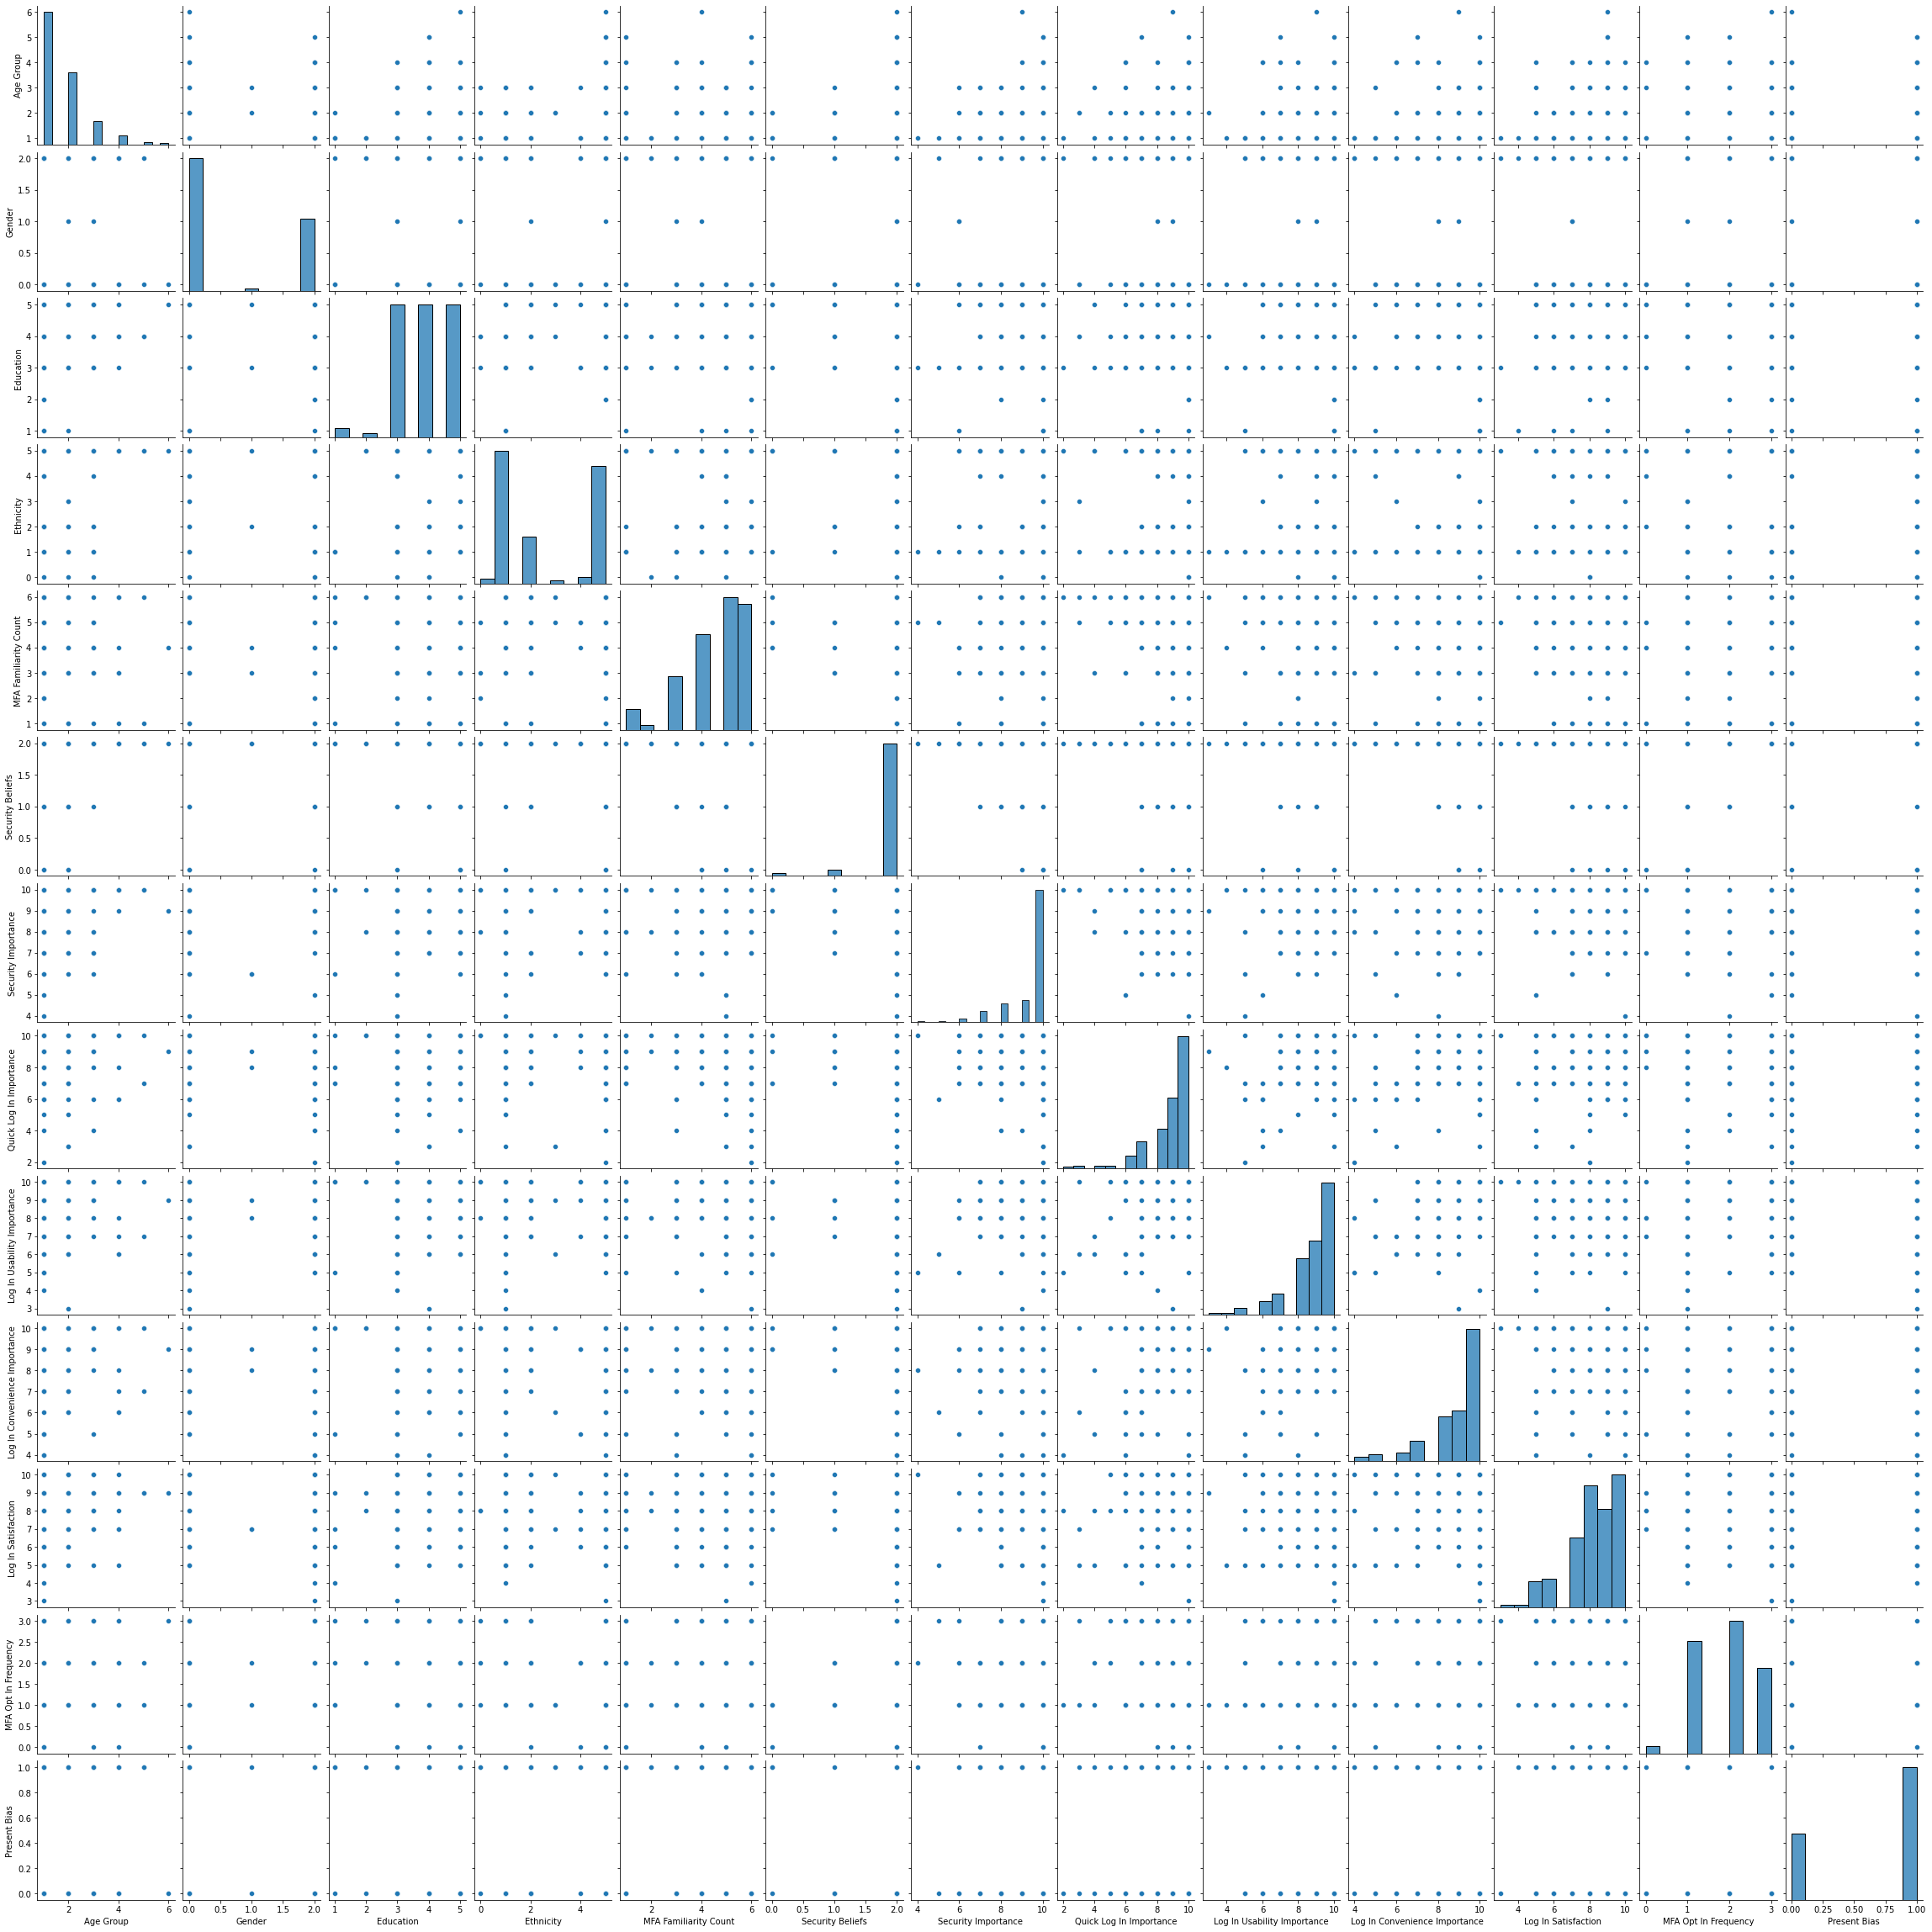

In [6]:
sns.pairplot(data)

/Users/darrelmschreiner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MFA Opt In Frequency', ylabel='Density'>

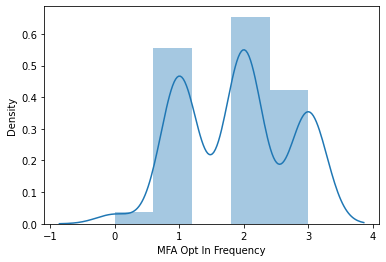

In [7]:
# distribution of the target
sns.distplot(data['MFA Opt In Frequency'])

<AxesSubplot:>

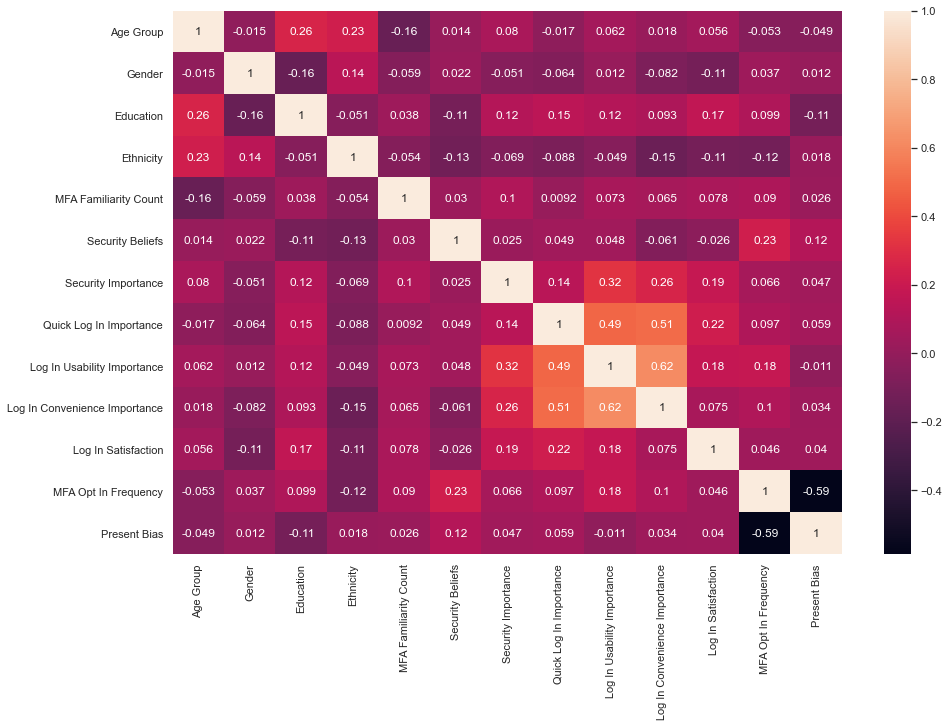

In [8]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(data.corr(), annot=True)

In [9]:
X = data[['Age Group', 'Gender', 'Education', 'Ethnicity']]

In [10]:
y = data['Present Bias']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =101)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
# print the intercept
print(lm.intercept_)

0.9344614454058568


In [17]:
lm.coef_

array([-0.01707368, -0.03014187, -0.06025938,  0.00426393])

In [18]:
X_train.columns

Index(['Age Group', 'Gender', 'Education', 'Ethnicity'], dtype='object')

In [19]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [20]:
cdf

Coeff
Age Group -0.017074
Gender    -0.030142
Education -0.060259
Ethnicity  0.004264

Interpreting the coefficients:

• Holding all other features fixed, a 1 unit increase in <b>Age</b> is associated with an *decrease of 0.017074 Present Bias*.

### Look at female vs male vs... to figure out if there's a correlation
• Holding all other features fixed, a 1 unit increase in <b>Gender</b>	is associated with an *decrease of 0.030142 Present Bias*.

• Holding all other features fixed, a 1 unit increase in <b>Education</b>	is associated with an *decrease of 0.060259 Present Bias*.

• Holding all other features fixed, a 1 unit increase in <b>Log In Convenience Importance</b> is associated with an *increase of 0.035955 Present Bias*.

### Look at ethnicity correlations
• Holding all other features fixed, a 1 unit increase in <b>Ethnicity</b>	is associated with an *increase of 0.004264 Present Bias*.



In [21]:
predictions = lm.predict(X_test)
predictions # predictions of our model for Present Bias

array([0.69764553, 0.54297941, 0.66354049, 0.62033682, 0.74087355,
       0.62031247, 0.6032811 , 0.6160665 , 0.52590574, 0.60325675,
       0.62035478, 0.62035478, 0.65073074, 0.56433498, 0.75792927,
       0.69766988, 0.59047136, 0.74087355, 0.68058981, 0.69764553,
       0.69766988, 0.58616512, 0.74087355, 0.68485374, 0.66354049,
       0.75790492, 0.56909144, 0.68487809, 0.68061416, 0.60754503,
       0.74087355, 0.75792927, 0.6032811 , 0.58620743, 0.62033043,
       0.6933816 , 0.62035478, 0.64644885])

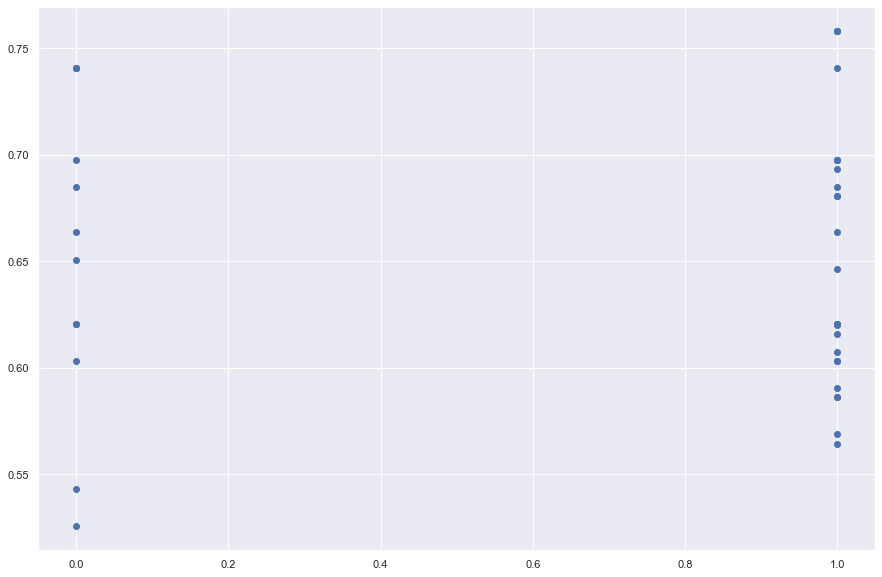

In [22]:
plt.scatter(y_test,predictions)

#### Residual Histogram

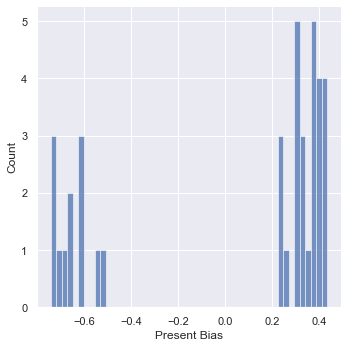

In [23]:
sns.displot((y_test-predictions), bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [24]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.44388026857482094
MSE: 0.22111607567612127
RMSE: 0.47022981155613824


In [26]:
lm.score(X_test, y_test)

-0.023370555372817625